# **Spotify Top Songs of 2023 - Exploratory Data Analysis**

<br>

**Objective: Investigate Spotify's most popular songs and gain an understanding of what attributes to song's success and create recommendations for artists to enter the music industry.**

In [ ]:
# importing necessary libraries and datasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/spotify-2023.csv', encoding='latin-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [ ]:
# Check the shape of the dataset
num_rows, num_columns = df.shape

num_rows, num_columns

(953, 24)

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

missing_values[missing_values > 0]

in_shazam_charts    50
key                 95
dtype: int64

In [ ]:
# Get basic statistics of the numerical columns
stats = df.describe()

stats

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


**Top 10 Artists with Most Songs:**

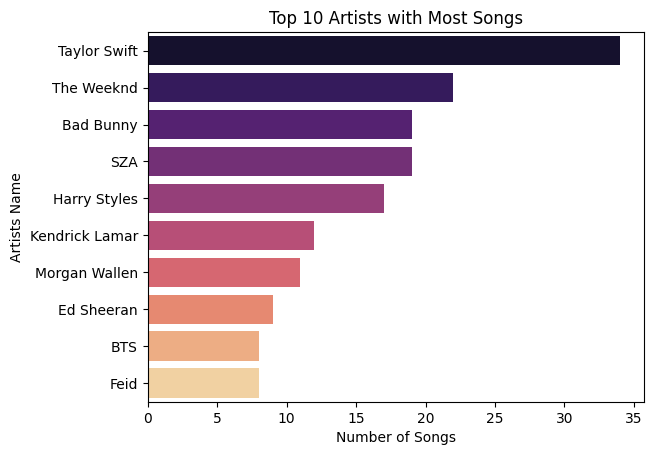

Taylor Swift      34
The Weeknd        22
Bad Bunny         19
SZA               19
Harry Styles      17
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
BTS                8
Feid               8
Name: artist(s)_name, dtype: int64

In [ ]:
#Finding Top 10 artists with most songs

top_artists = df['artist(s)_name'].value_counts().head(10)

# Plot
sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')
plt.xlabel('Number of Songs')
plt.ylabel('Artists Name')
plt.title('Top 10 Artists with Most Songs')
plt.show()

top_artists

Top 10 Songs with Most Streams:

In [ ]:
#converting data to numeric

df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

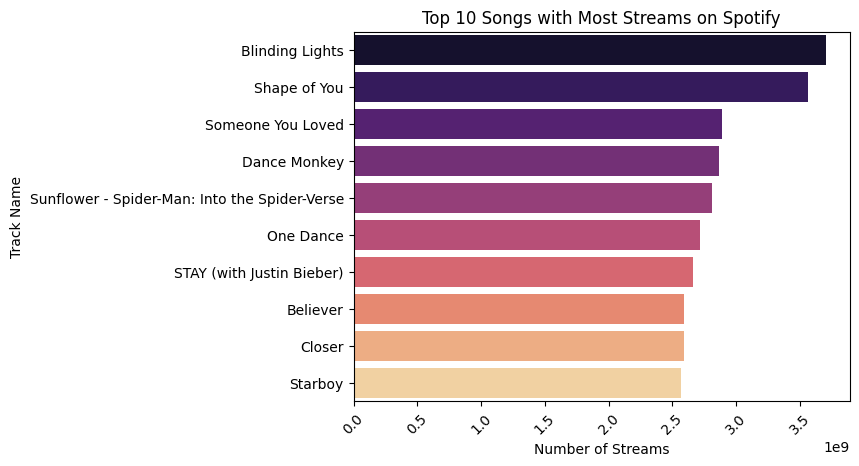

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3.703895e+09
179,Shape of You,Ed Sheeran,3.562544e+09
86,Someone You Loved,Lewis Capaldi,2.887242e+09
620,Dance Monkey,Tones and I,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09
162,One Dance,"Drake, WizKid, Kyla",2.713922e+09
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2.665344e+09
140,Believer,Imagine Dragons,2.594040e+09
725,Closer,"The Chainsmokers, Halsey",2.591224e+09
48,Starboy,"The Weeknd, Daft Punk",2.565530e+09


In [ ]:
# Top 10 songs with most streams on Spotify
top_streams = df[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head(10)

# Plot
sns.barplot(x=top_streams['streams'], y=top_streams['track_name'], palette='magma')
plt.xlabel('Number of Streams')
plt.ylabel('Track Name')
plt.title('Top 10 Songs with Most Streams on Spotify')
plt.xticks(rotation=45)
plt.show()

top_streams

**Songs per year of release:**

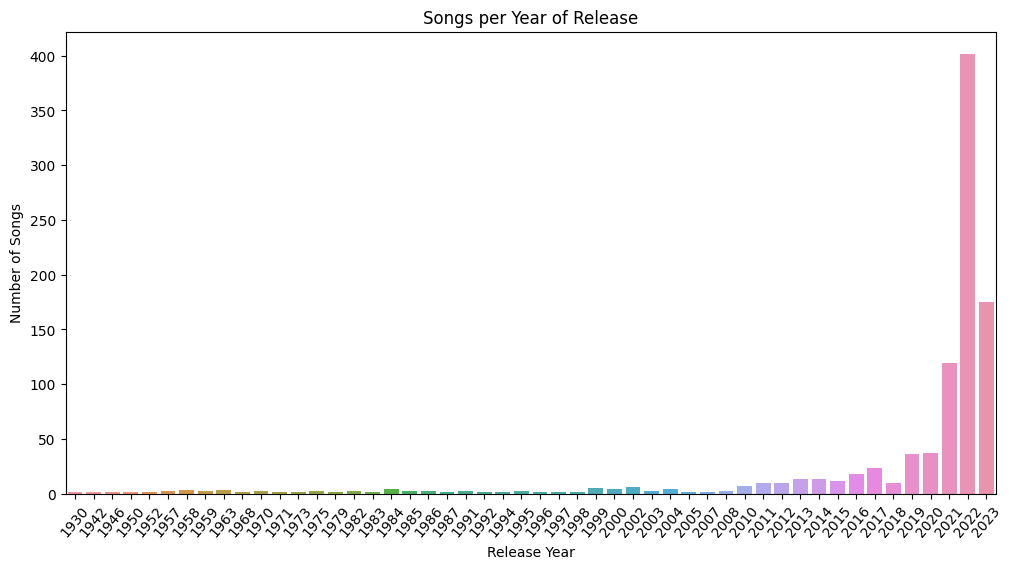

In [ ]:
songs_per_year = df['released_year'].value_counts().sort_index()

#Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=songs_per_year.index, y=songs_per_year.values)
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.title('Songs per Year of Release')
plt.xticks(rotation=50)
plt.show()

**Identifying Trends:**

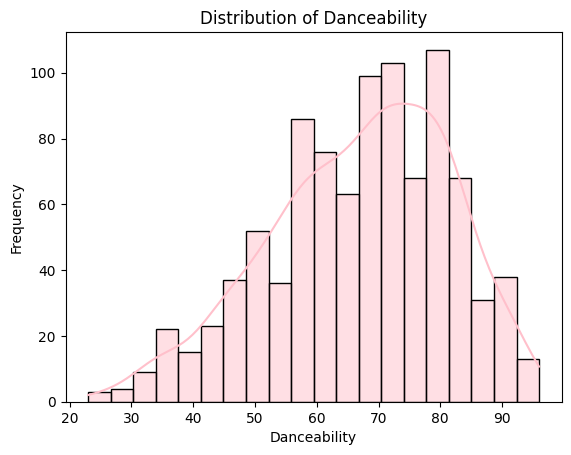

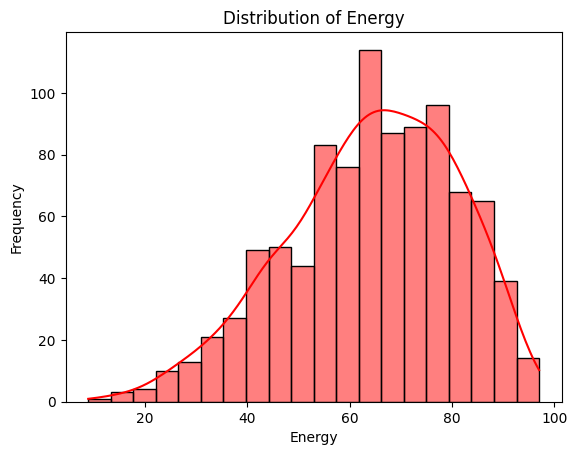

In [ ]:
# Plot histogram for danceability
sns.histplot(df['danceability_%'], bins=20, kde=True, color='pink')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.title('Distribution of Danceability')
plt.show()


# Plot histogram for energy
sns.histplot(df['energy_%'], bins=20, kde=True, color='red')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.title('Distribution of Energy')
plt.show()


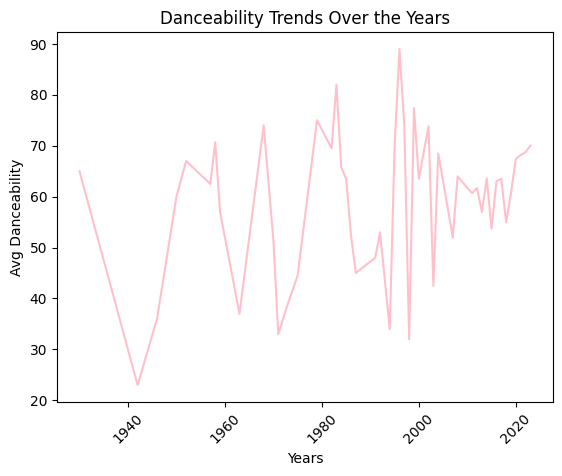

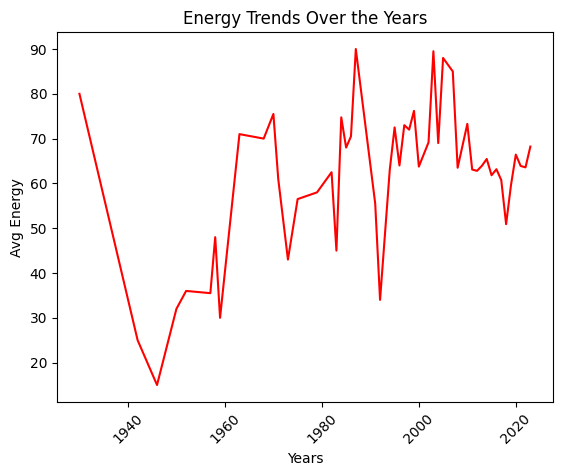

In [ ]:
# Plot trends in danceability over the years
average_danceability_by_year = df.groupby('released_year')['danceability_%'].mean()

sns.lineplot(x=average_danceability_by_year.index, y=average_danceability_by_year.values, color='pink')
plt.xlabel('Years')
plt.ylabel('Avg Danceability')
plt.title('Danceability Trends Over the Years')
plt.xticks(rotation=45)
plt.show()

# Plot trends in energy over the years

average_energy_by_year = df.groupby('released_year')['energy_%'].mean()
sns.lineplot(x=average_energy_by_year.index, y=average_energy_by_year.values, color='red')
plt.xlabel('Years')
plt.ylabel('Avg Energy')
plt.title('Energy Trends Over the Years')
plt.xticks(rotation=45)
plt.show()

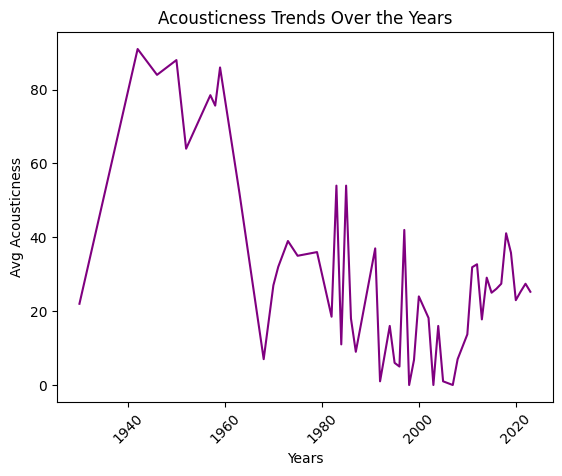

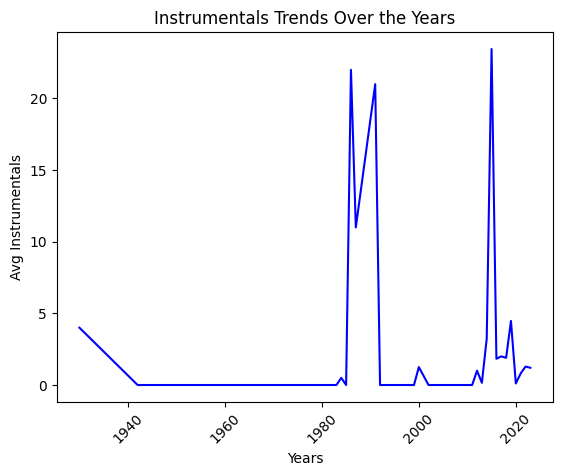

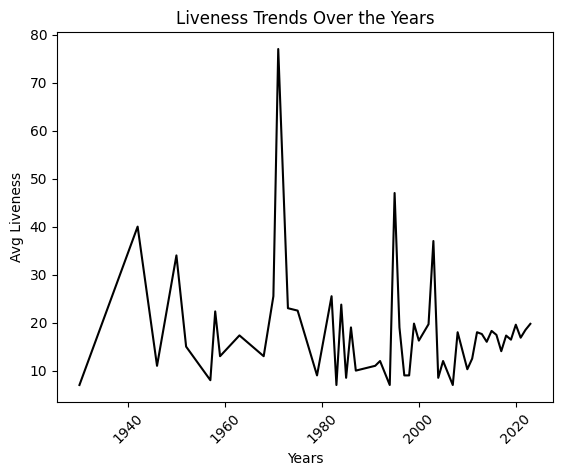

In [ ]:
# ACOUSTICS
# Plot trends in acoustics over the years
average_ac_by_year = df.groupby('released_year')['acousticness_%'].mean()
sns.lineplot(x=average_ac_by_year.index, y=average_ac_by_year.values, color='purple')
plt.xlabel('Years')
plt.ylabel('Avg Acousticness')
plt.title('Acousticness Trends Over the Years')
plt.xticks(rotation=45)
plt.show()

#INSTRUMENTALS
# Plot trends in instrumentals over the years
average_inst_by_year = df.groupby('released_year')['instrumentalness_%'].mean()
sns.lineplot(x=average_inst_by_year.index, y=average_inst_by_year.values, color='blue')
plt.xlabel('Years')
plt.ylabel('Avg Instrumentals')
plt.title('Instrumentals Trends Over the Years')
plt.xticks(rotation=45)
plt.show()

#LIVENESS
# Plot trends in liveness over the years
average_live_by_year = df.groupby('released_year')['liveness_%'].mean()
sns.lineplot(x=average_live_by_year.index, y=average_live_by_year.values, color='black')
plt.xlabel('Years')
plt.ylabel('Avg Liveness')
plt.title('Liveness Trends Over the Years')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import plotly.express as px

# Scatter plot comparing song popularity and danceability

fig = px.scatter(df, x='danceability_%', y='streams', title='Popularity vs. Danceability in Songs')
fig.update_layout(xaxis_title='Danceability (%)', yaxis_title='Number of Streams')
fig.show()

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
#Energy vs. Valence vs. Danceability

df['key'] = pd.Categorical(df['key']).codes
df['mode'] = pd.Categorical(df['mode']).codes

fig_3d_scatter = px.scatter_3d(df, x='energy_%', y='valence_%', z='danceability_%', color='streams',
                               size='streams', hover_name='track_name',
                               title='Energy vs. Valence vs. Danceability')
fig_3d_scatter.show()

<Axes: >

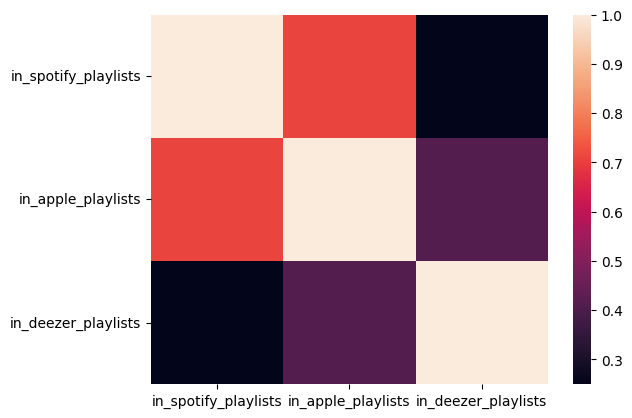

In [ ]:
from seaborn import heatmap

heatmap(data=df[[item for item in df.columns if 'playlist' in item]].corr())

<Axes: >

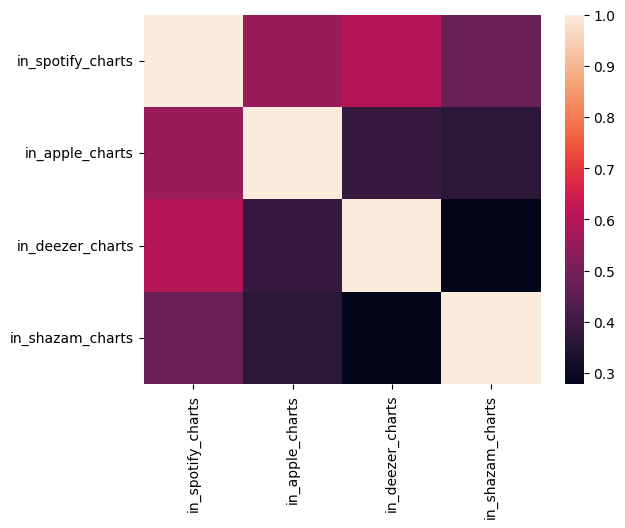

In [ ]:
heatmap(data=df[[item for item in df.columns if 'charts' in item]].corr())

# **Spotify Analysis Summary:**

<br>

**Top 10 Artists with Most Songs:**

1. Taylor Swift : 34 songs <br>
2. The Weekend: 22 songs <br>
3. Bad Bunny: 19 songs <br>
4. SZA: 19 songs <br>
5. Harry Styles: 17 songs <br>
6. Kendrick Lamar: 12 songs <br>
7. Morgan Wallen: 11 songs <br>
8. Ed Sheeran: 9 songs <br>
9. BTS: 8 songs <br>
10. Feid: 8 songs <br>

**Top 10 Most Streamed Songs:**
1. Blinding Lights - The Weekend
2. Shape of You - Ed Sheeran
3. Someone You Loved - Lewis Capaldi
4. Dance Monkey - Tones and I
5. Sunflower (Spiderman) - Post Malone, Swae Lee
6. One Dance - Drake, WizKid, Kyla
7. Stay - Justin Bieber, The Kid Laroi
8. Believer - Imagine Dragons
9. Closer - The Chainsmokers, Halsey
10. Starboy - The Weekend, Daft Punk

**Song Trends:**


*   Over 400 songs were released in the year 2022, followed by 170 songs released in 2023.
*   Overall, danceability and energy song trends are high. While acoustic, instrumental and liveness trends have dramatically decreased over the years.
*  There is a strong correlation between danceability and popularity in songs, which is proven by the top 10 songs that are all up-beat.

